In [1]:
import random
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [2]:
# List of top 25 subreddit names to read files
subredditNames = ["AmItheAsshole", "AskReddit", "Damnthatsinteresting", "DestinyTheGame", 
                  "Home", "LivestreamFail", "NoStupidQuestions", "PublicFreakout", "Unexpected", 
                  "WhitePeopleTwitter", "antiwork", "diablo4", "explainlikeimfive", "facepalm", 
                  "funny", "gaming", "interestingasfuck", "leagueoflegends", "mildlyinfuriating", 
                  "movies", "pcmasterrace", "pics", "therewasanattempt", "videos", "worldnews"]

In [3]:
# Updates the true count of tokens in subreddit
def UpdateTrueCount(trueCount, token):
    if token in trueCount:
        trueCount[token] += 1
    else:
        trueCount[token] = 1

In [4]:
def FalsePositiveRate(buffer, trueCount, m, k):
    fpr = 0
    for key in buffer.keys():
        if trueCount[key] < (m / k):
            fpr += 1
        
    return fpr / len(buffer)

In [5]:
# Prints out the first n tokens with the highest count in a subreddit
def nHighestCount(trueCount, n):
    # Sort the trueCount
    sortedDict = {k: v for k, v in sorted(trueCount.items(), key=lambda item: item[1], reverse=True)}
    
    # Return first n values
    return {k: sortedDict[k] for k in list(sortedDict)[:n]}

In [6]:
# Basic Misra-Gries algorithm
def MisraGries(token, buffer, k): 
    if token in buffer:
        buffer[token] = buffer[token] + 1
    elif len(buffer) < k-1:
        buffer[token] = 1
    else:
        keys = list(buffer.keys())
        for key in keys:
            buffer[key] -= 1
            if buffer[key] == 0:
                del buffer[key]

In [7]:
# Needs uncommenting if not downloaded
# nltk.download('omw-1.4')
# nltk.download('stopwords')
# nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')
stop.append("like")
stop.append("get")

# Checks if a word is a common word, url, and lemmatizes the word
def CommonWord(word):
    isCommonWord = False

    if len(word) <= 1 or word in stop: isCommonWord = True
    elif word.startswith('https://') or word.startswith('http://'): isCommonWord = True

    # Performs Lemmatization
    word = wordnet_lemmatizer.lemmatize(word)
    
    return word, isCommonWord

In [8]:
# FPR information for each subreddit
FPRs = {}

# True Counts for each subreddit
trueCounts = {}

# Buffer information for all subreddits combined
fullBuffer = {}
fullCount = {}
fullK = 801
fullM = 0

# Perform Misra-Gries on each subreddit separately
for subreddit in subredditNames:
    print(subreddit)
    with open('Reddit_Comments/' + subreddit + '.txt') as f:
        buffer = {}
        trueCount = {}
        k = 801 # Buffer size of 800 chosen after testing false-positive rates
        m = 0
        for line in f:
            tokens = line.split()
            random.shuffle(tokens) # Randomizes the tokens for each reply
            for token in tokens:
                token, isCommonWord = CommonWord(token)
                if isCommonWord: continue # Don't run through algorithm if word is "common"
                
                m += 1
                MisraGries(token, buffer, k)
                
                fullM += 1
                MisraGries(token, fullBuffer, fullK)
                
                UpdateTrueCount(trueCount, token)
                UpdateTrueCount(fullCount, token)
            
    trueCounts[subreddit] = trueCount
    
#     print(buffer)
#     print(nHighestCount(trueCount, 10))
    FPRs[subreddit] = FalsePositiveRate(buffer, trueCount, m, k)
    print("False Positive Rate: ", FPRs[subreddit], '\n')

AmItheAsshole
False Positive Rate:  0.710261569416499 

AskReddit
False Positive Rate:  0.8108552631578947 

Damnthatsinteresting
False Positive Rate:  0.8220640569395018 

DestinyTheGame
False Positive Rate:  0.7771084337349398 

Home
False Positive Rate:  0.8130081300813008 

LivestreamFail
False Positive Rate:  0.6875 

NoStupidQuestions
False Positive Rate:  0.7216035634743875 

PublicFreakout
False Positive Rate:  0.7707948243992606 

Unexpected
False Positive Rate:  0.8215712383488681 

WhitePeopleTwitter
False Positive Rate:  0.7218390804597701 

antiwork
False Positive Rate:  0.7293577981651376 

diablo4
False Positive Rate:  0.7670250896057348 

explainlikeimfive
False Positive Rate:  0.8362892223738063 

facepalm
False Positive Rate:  0.6580188679245284 

funny
False Positive Rate:  0.6917808219178082 

gaming
False Positive Rate:  0.779467680608365 

interestingasfuck
False Positive Rate:  0.7711538461538462 

leagueoflegends
False Positive Rate:  0.8372093023255814 

mildly

In [9]:
# Print out the FPR and top 25 highest used words across all 25 subreddits
print("False Positive Rate: ", FalsePositiveRate(fullBuffer, fullCount, fullM, fullK), '\n')
print(nHighestCount(fullCount, 25))

False Positive Rate:  0.7676056338028169 

{'people': 9077, 'one': 8795, 'would': 8517, 'time': 7365, 'make': 5857, 'think': 5836, 'game': 5663, 'know': 5379, 'even': 5345, 'thing': 5261, 'want': 4798, 'good': 4769, 'need': 4705, 'go': 4628, 'year': 4605, 'also': 4472, 'really': 4361, 'way': 4350, 'see': 4332, 'look': 3915, 'still': 3879, 'much': 3873, 'work': 3817, 'could': 3787, 'going': 3735}


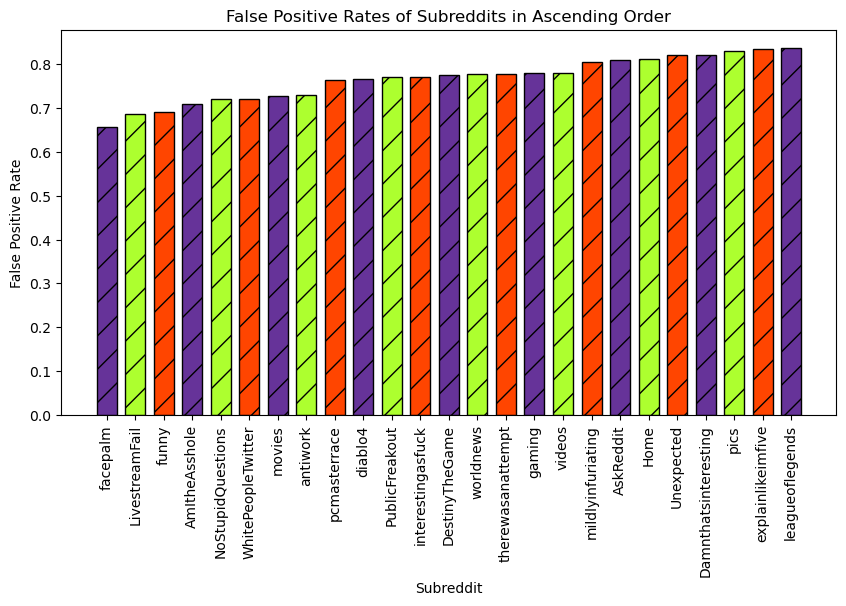

In [10]:
# Graph of FPRs of all 25 subreddits
FPRs = dict(sorted(FPRs.items(), key=lambda item: item[1]))

subreddits = list(FPRs.keys())
values = list(FPRs.values())
  
fig = plt.figure(figsize = (10, 5))
 
# Creating the bar plot
plt.bar(subreddits, values, color=['rebeccapurple', 'greenyellow', 'orangered'], edgecolor="black", width=0.7, hatch="/")

plt.xticks(rotation='vertical')
plt.xlabel("Subreddit")
plt.ylabel("False Positive Rate")
plt.title("False Positive Rates of Subreddits in Ascending Order")

plt.show()

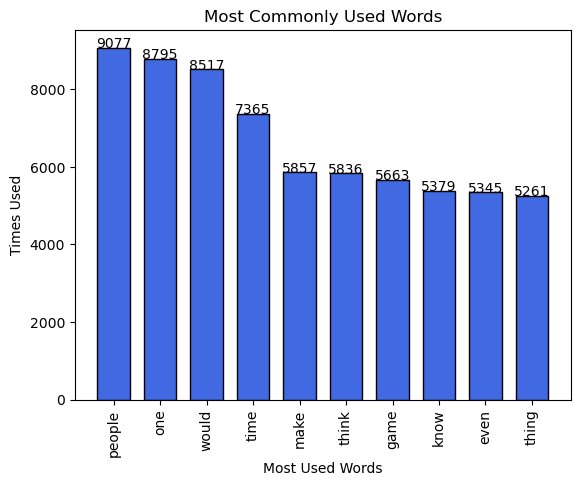

In [11]:
# Graph of top 10 highest used words across all subreddits
topWords = nHighestCount(fullCount, 25)

words = list(topWords.keys())[:10]
values = list(topWords.values())[:10]

# Creating the bar plot
plt.bar(words, values, color="royalblue", edgecolor="black", width=0.7)

plt.xticks(rotation='vertical')
plt.xlabel("Most Used Words")
plt.ylabel("Times Used")
plt.title("Most Commonly Used Words")

for i in range(len(words)):
    plt.text(i, values[i], values[i], ha='center')

plt.show()

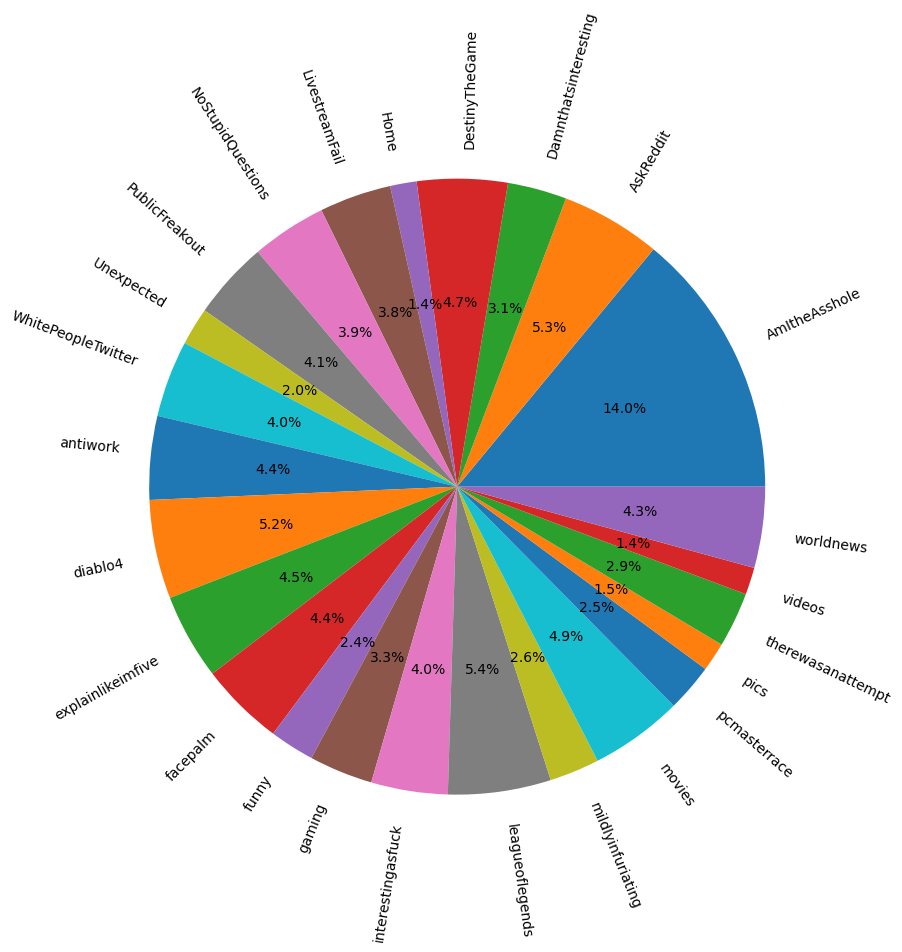

In [12]:
# Graph of subreddits with the most words used
subreddits = list(trueCounts.keys())
numbers = list(trueCounts.values())
numbers = list(sum(numbers[i].values()) for i in range(len(numbers)))

fig = plt.figure(figsize = (10, 10))

plt.pie(numbers, labels=subreddits, autopct='%1.1f%%', rotatelabels=True)
# plt.pie(numbers, labels=subreddits, autopct='%1.1f%%', rotatelabels=True, pctdistance=1.1, labeldistance=.4)
plt.show()